##Import Library

In [ ]:
import os
import tensorflow as tf
import requests
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalMaxPool2D, concatenate
import matplotlib.pyplot as plt
import shutil
import random
import cv2
from PIL import Image
import numpy as np
from keras.layers import BatchNormalization
from keras import Model
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [ ]:
!pip install Augmentor --quiet
import Augmentor
!pip install tqdm
from tqdm import tqdm
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Data Preparation

In [ ]:
od.download("https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset?select=Test")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadyusufridho
Your Kaggle Key: ··········


100%|██████████| 1.25G/1.25G [00:32<00:00, 41.7MB/s]


In [ ]:
source_path = 'plant-disease-recognition-dataset'
source_train = os.path.join(source_path, 'Train/Train')
source_test = os.path.join(source_path, 'Test/Test')

In [ ]:
training_path = 'data/train'
testing_path = 'data/test'
try:
  os.mkdir('data')
except:
  print('path exist')

try:
  os.mkdir(testing_path)
except:
  print('path exist')

try:
  os.mkdir(training_path)
except:
  print('path exist')


In [ ]:
categories = os.listdir(source_train)
categories

['Healthy', 'Powdery', 'Rust']

In [ ]:
for category in categories:
  try:
    os.mkdir(os.path.join(training_path, category))
    os.mkdir(os.path.join(testing_path, category))
  except:
    print('path exist!')

In [ ]:
list_class = os.listdir(training_path)
print(list_class)

['Healthy', 'Powdery', 'Rust']


In [ ]:
len(list_class)

3

In [ ]:
#SET LABEL CLASS
dic_labels = {}
list_class.sort()
for index, category in enumerate(categories):
  dic_labels[category] = str(index)
dic_labels

{'Healthy': '0', 'Powdery': '1', 'Rust': '2'}

In [ ]:
dic_class = {'class' : [], 'total_img' : []}
for category in categories :
  total_img = os.listdir(os.path.join(source_train, category))
  dic_class['class'].append(category)
  dic_class['total_img'].append(len(total_img))
dic_class


{'class': ['Healthy', 'Powdery', 'Rust'], 'total_img': [458, 430, 434]}

In [ ]:
dic_class = {'class' : [], 'total_img' : []}
for category in categories :
  total_img = os.listdir(os.path.join(source_test, category))
  dic_class['class'].append(category)
  dic_class['total_img'].append(len(total_img))
dic_class


{'class': ['Healthy', 'Powdery', 'Rust'], 'total_img': [50, 50, 50]}

In [ ]:
#copy file training ke folder data
ROOT_DIR = os.path.abspath(os.curdir)
os.chdir(ROOT_DIR)
for i in range(len(dic_class['class'])):
  os.chdir(ROOT_DIR)
  folder_path = os.path.join(source_train, dic_class['class'][i] )
  list_img = os.listdir(folder_path)
  for index, img in enumerate(list_img):
    if 'JPG' in img or 'jpg' in img :
      file_path = os.path.join(folder_path, img)
      image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
      resized = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA)
      os.chdir(os.path.join(training_path, dic_class['class'][i]))
      cv2.imwrite(img, resized)
      os.chdir(ROOT_DIR)
    if index == 999 :
      break
os.chdir(ROOT_DIR)

In [ ]:
#copy file testing ke folder data
ROOT_DIR = os.path.abspath(os.curdir)
os.chdir(ROOT_DIR)
for i in range(len(dic_class['class'])):
  os.chdir(ROOT_DIR)
  folder_path = os.path.join(source_test, dic_class['class'][i] )
  list_img = os.listdir(folder_path)
  for index, img in enumerate(list_img):
    if 'JPG' in img or 'jpg' in img :
      file_path = os.path.join(folder_path, img)
      image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
      resized = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA)
      os.chdir(os.path.join(testing_path, dic_class['class'][i]))
      cv2.imwrite(img, resized)
      os.chdir(ROOT_DIR)
    if index == 999 :
      break
os.chdir(ROOT_DIR)

In [ ]:
dic_class = {'class' : [], 'total_img' : []}
for category in categories :
  total_img = os.listdir(os.path.join(training_path, category))
  dic_class['class'].append(category)
  dic_class['total_img'].append(len(total_img))
dic_class


{'class': ['Healthy', 'Powdery', 'Rust'], 'total_img': [500, 500, 500]}

In [ ]:
dic_class = {'class' : [], 'total_img' : []}
for category in categories :
  total_img = os.listdir(os.path.join(testing_path, category))
  dic_class['class'].append(category)
  dic_class['total_img'].append(len(total_img))
dic_class


{'class': ['Healthy', 'Powdery', 'Rust'], 'total_img': [50, 50, 50]}

In [ ]:
def perbanyak_(ini, hanya):
  source_dir = ini
  output_dir = "."
  p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
  p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

  p.sample(hanya)


jumlah_data = 500
for category in os.listdir(os.path.join(training_path)):
  cof = os.path.join(training_path,category)
  numb = len(os.listdir(cof))
  perbanyak_(cof, jumlah_data - numb)

Initialised with 458 image(s) found.
Output directory set to data/train/Healthy/..

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FC496BB3220>: 100%|██████████| 42/42 [00:00<00:00, 105.98 Samples/s]


Initialised with 430 image(s) found.
Output directory set to data/train/Powdery/..

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FC496C0ACA0>: 100%|██████████| 70/70 [00:00<00:00, 106.42 Samples/s]


Initialised with 434 image(s) found.
Output directory set to data/train/Rust/..

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7FC496BBDA30>: 100%|██████████| 66/66 [00:00<00:00, 113.75 Samples/s]


In [ ]:
# Preparing Data Testing & re-shape ke ukuran 224x224
X_test = []
y_test = []

list_category = os.listdir(testing_path)
list_category.sort()
for category in list_category :
  list_image = os.listdir(os.path.join(testing_path, category))
  for image in list_image :
    img = cv2.imread(os.path.join(testing_path, category, image), cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
    img = np.array(resized)
    X_test.append(img)
    y_test.append(dic_labels[category])

In [ ]:
X_test = np.array(X_test)
X_test.shape

(150, 224, 224, 3)

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(training_path,  image_size=(224, 224))

Found 1500 files belonging to 3 classes.


In [ ]:
#Data Normalization
data = data.map(lambda x,y : (x/255, y))

In [ ]:
data2 = tf.keras.utils.image_dataset_from_directory(testing_path,  image_size=(224, 224))

Found 150 files belonging to 3 classes.


In [ ]:
#Data Normalization
data2 = data.map(lambda x,y : (x/255, y))

In [ ]:
#Set Data Size
train_size = int(len(data)*.8)
val_size = len(data)-train_size

In [ ]:
#splitting Data to train and validation
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

##Membangun model EfficientNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB4

In [ ]:
#Getting pretraind model of EfficientNet Model from imagenet
base_model = VGG19(include_top = False, weights='imagenet', input_shape=(224, 224, 3))

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
#Making Naive Inception Modul
def inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='swish')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='swish')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='swish')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5], axis=-1)
	return layer_out

In [ ]:
output_new_layer = base_model.output
base_model.output.shape

TensorShape([None, 7, 7, 512])

In [ ]:
base_model.input.shape


TensorShape([None, 224, 224, 3])

In [ ]:
#ADDING NEW LAYERS
output_new_layer = BatchNormalization(input_shape=(7,7, 512))(output_new_layer)
output_new_layer = inception_module(output_new_layer, 42, 84, 130)
output_new_layer = inception_module(output_new_layer, 42, 84, 130)
output_new_layer = GlobalMaxPool2D()(output_new_layer)
predictions = Dense(len(list_class), activation='softmax', name='pred') (output_new_layer)
new_model = Model(inputs=base_model.input, outputs = predictions)


In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [ ]:
#Freezing top Layers for transfer Learning
for layer in new_model.layers:
  layer.trainable = False
  if 'block4_pool' in layer.name:
    break

##Proses Training

In [ ]:
new_model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist1 = new_model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
37/37 [==============================] - 42s 813ms/step - loss: 0.8467 - accuracy: 0.6875 - val_loss: 18.0089 - val_accuracy: 0.3323
Epoch 2/10
37/37 [==============================] - 12s 310ms/step - loss: 0.2558 - accuracy: 0.9282 - val_loss: 7.9607 - val_accuracy: 0.3513
Epoch 3/10
37/37 [==============================] - 11s 302ms/step - loss: 0.1623 - accuracy: 0.9561 - val_loss: 8.1151 - val_accuracy: 0.5158
Epoch 4/10
37/37 [==============================] - 12s 310ms/step - loss: 0.2924 - accuracy: 0.9417 - val_loss: 2.3020 - val_accuracy: 0.6044
Epoch 5/10
37/37 [==============================] - 12s 322ms/step - loss: 0.1898 - accuracy: 0.9586 - val_loss: 2.0641 - val_accuracy: 0.6741
Epoch 6/10
37/37 [==============================] - 12s 310ms/step - loss: 0.1998 - accuracy: 0.9527 - val_loss: 0.3762 - val_accuracy: 0.8829
Epoch 7/10
37/37 [==============================] - 14s 374ms/step - loss: 0.2517 - accuracy: 0.9527 - val_loss: 5.7461 - val_accuracy: 0.607

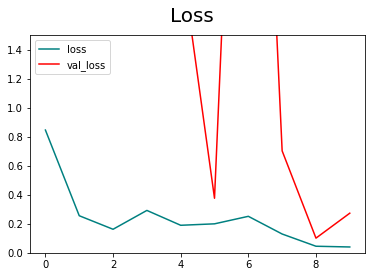

In [ ]:
fig = plt.figure()
plt.plot(hist1.history['loss'], color='teal', label='loss')
plt.plot(hist1.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0, 1.5)
plt.show()


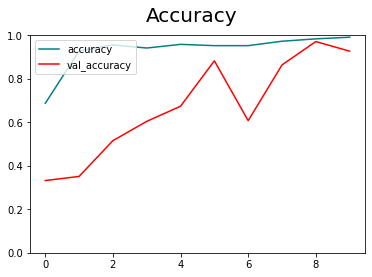

In [ ]:
fig = plt.figure()
plt.plot(hist1.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist1.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0, 1)
plt.show()

In [ ]:
yhat = new_model.predict(X_test)

5/5 [==============================] - 6s 1s/step


In [ ]:
y_prediction = []
for i in tqdm(range(len(yhat))):
  result = np.argmax(yhat[i], axis=-1)
  y_prediction.append(str(result))

100%|██████████| 150/150 [00:00<00:00, 162485.95it/s]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        50
           1       0.00      0.00      0.00        50
           2       0.45      0.98      0.61        50

    accuracy                           0.56       150
   macro avg       0.44      0.56      0.46       150
weighted avg       0.44      0.56      0.46       150



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


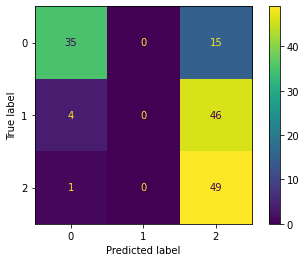

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

##Fine Tuning

In [ ]:
#UnFreezing top Layers for transfer Learning dan dengan Lr rendah
for layer in new_model.layers:
  layer.trainable = True

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [ ]:
new_model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist1 = new_model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
37/37 [==============================] - 25s 633ms/step - loss: 0.8896 - accuracy: 0.6833 - val_loss: 66.2393 - val_accuracy: 0.3006
Epoch 2/10
37/37 [==============================] - 25s 679ms/step - loss: 0.4851 - accuracy: 0.8167 - val_loss: 4.9385 - val_accuracy: 0.3228
Epoch 3/10
37/37 [==============================] - 25s 663ms/step - loss: 0.2068 - accuracy: 0.9223 - val_loss: 8.2123 - val_accuracy: 0.3228
Epoch 4/10
37/37 [==============================] - 26s 691ms/step - loss: 0.1623 - accuracy: 0.9502 - val_loss: 0.7834 - val_accuracy: 0.6835
Epoch 5/10
37/37 [==============================] - 22s 603ms/step - loss: 0.1224 - accuracy: 0.9569 - val_loss: 53.6928 - val_accuracy: 0.3038
Epoch 6/10
37/37 [==============================] - 22s 597ms/step - loss: 0.1711 - accuracy: 0.9468 - val_loss: 371.5511 - val_accuracy: 0.4335
Epoch 7/10
37/37 [==============================] - 23s 605ms/step - loss: 0.1284 - accuracy: 0.9628 - val_loss: 116.0119 - val_accuracy: 

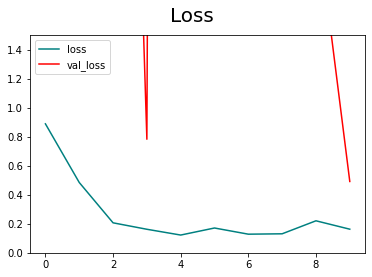

In [ ]:
fig = plt.figure()
plt.plot(hist1.history['loss'], color='teal', label='loss')
plt.plot(hist1.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0, 1.5)
plt.show()


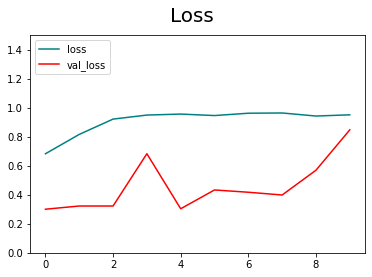

In [ ]:
fig = plt.figure()
plt.plot(hist1.history['accuracy'], color='teal', label='loss')
plt.plot(hist1.history['val_accuracy'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0, 1.5)
plt.show()


In [ ]:
yhat = new_model.predict(X_test)

5/5 [==============================] - 1s 157ms/step


In [ ]:
y_prediction = []
for i in tqdm(range(len(yhat))):
  result = np.argmax(yhat[i], axis=-1)
  y_prediction.append(str(result))

100%|██████████| 150/150 [00:00<00:00, 198468.64it/s]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.33      1.00      0.50        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


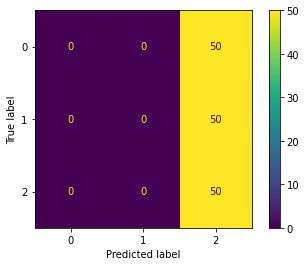

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()